In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
res = np.load("../results_hessian/vgg_cifar_5_400_ln20/hess/results9000.npz", allow_pickle=True)
targets = res["targets"]
clusters = res["clusters"]

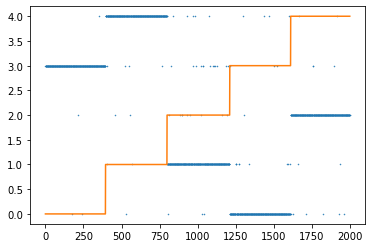

In [156]:
plt.figure()
plt.plot(clusters, '.', markersize=1, color="tab:blue")
plt.plot(targets, color="tab:orange")
plt.show()

In [84]:
# find the best match of clusters and targets
from itertools import permutations

def cluster_accuracy(clusters, targets):
    n_classes = max(targets) + 1
    acc_max = -1
    best_perm = []
    best_pred = []
    for perm in permutations(range(n_classes)):
        cluster_pred = [perm[c] for c in clusters]
        acc = [cluster_pred[i]==targets[i] for i in range(len(targets))]
        acc = np.sum(acc) * 1.0 / len(targets)
        if acc > acc_max:
            acc_max = acc
            best_perm = perm
            best_pred = cluster_pred
    return acc_max, best_perm, best_pred

In [124]:
sum([t==1 for t in targets])

404

In [157]:
acc, perm, cluster_pred = cluster_accuracy(clusters, targets)
print("accuracy by spectral clustering: %g" % acc)
print(perm)

accuracy by spectral clustering: 0.964
(3, 2, 4, 0, 1)


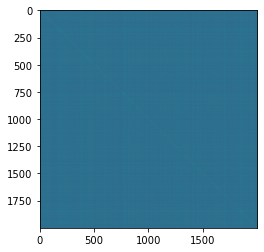

In [70]:
G = res["gram"]
plt.imshow(np.log(np.abs(G)))

In [71]:
ndata = G.shape[0]
diag = np.sqrt(np.diag(G))
A = G / (np.reshape(diag, (ndata, 1)) * np.reshape(diag, (1, ndata)))

In [40]:
ndata = G.shape[0]
diag = np.diag(G)
B = np.reshape(diag, (ndata, 1)) * np.ones((1,ndata)) + np.ones((ndata,1)) * np.reshape(diag, (1, ndata)) - 2*G
B = np.sqrt(B)

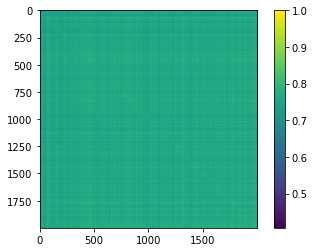

In [72]:
plt.imshow(A)
plt.colorbar()

In [32]:
A[1,2]

0.20920054064174134

In [42]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, affinity="precomputed")
sc.fit(B)
clusters = sc.labels_

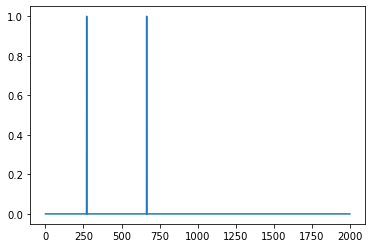

In [43]:
plt.plot(clusters)